# PCA ON OSMIA OCCURRENCE POINTS ONLY, AMERICA TRANFORMED TO OSMIA PCA SPACE
# EUCLID DIST BETWEEN

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

In [3]:
crta_coords = pd.read_csv('calculate_aoo/df2csv/cornuta_all.csv')
crta_coords = crta_coords[(crta_coords['lat']>0) & (crta_coords['long']>-20)]
# print(f'lat_min = {crta_coords['lat'].min()}\nlat_max = {crta_coords['lat'].max()}\nlon_min = {crta_coords['long'].min()}\nlat_max = {crta_coords['long'].max()}\n')

In [4]:
america = pd.read_csv('data/csv/10k_america_bioclim_ndvi.csv', index_col=None)
america = america.drop(columns='Unnamed: 0')
america = america[america['bio_13']!= -3.4e+38]
america = america[america['elev']> 0]
america_points = america[['lat', 'lon']].reset_index(drop=True)
america = america.drop(columns=['lat', 'lon', 'bio_8', 'bio_4', 'bio_7'])
#america['group'] = 'america'

In [5]:
bio_columns = [col for col in america.columns if col.startswith('bio_')]
other_columns = [col for col in america.columns if not col.startswith('bio_')]
bio_columns_sorted = sorted(bio_columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1])))
other_columns_sorted = sorted(other_columns)
sorted_columns = bio_columns_sorted + other_columns_sorted
america = america[sorted_columns]

In [6]:
america.describe()

,bio_1,bio_2,bio_3,bio_5,bio_6,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000
mean,8.379412,13.170054,34.686399,28.133145,-11.084560,1.989141,19.782900,-3.609023,745.135425,101.041469,31.820352,42.666961,275.061668,110.543076,224.174139,155.037337,735.869778,0.235197
std,6.865420,2.420581,9.044435,5.347003,9.759577,12.744884,5.157114,9.630384,412.019893,51.872439,25.567825,22.180030,146.538098,83.993989,104.611049,149.920757,668.523579,0.099214
min,-5.608333,5.558333,18.310658,7.500000,-30.100000,-21.066668,0.833333,-22.516666,60.000000,10.000000,0.000000,5.816862,24.000000,0.000000,2.000000,17.000000,1.000000,-0.194264
25%,2.720833,11.466667,26.796895,23.700000,-18.500000,-8.766666,15.750000,-10.800000,416.000000,72.000000,11.000000,23.083239,189.000000,42.000000,150.000000,54.000000,254.000000,0.166246
50%,7.679167,12.658334,34.080300,28.500000,-10.700000,-1.433333,19.516666,-3.800000,695.000000,98.000000,22.000000,40.438663,269.000000,80.000000,238.000000,108.000000,464.000000,0.242886
75%,13.572916,14.916667,40.714015,32.400000,-3.600000,14.483334,23.966667,3.591667,1009.000000,118.000000,50.000000,58.471063,329.000000,171.000000,297.000000,209.000000,1120.000000,0.304186
max,24.941666,21.108334,70.047165,45.000000,17.400000,29.100000,34.783333,20.933334,4233.000000,577.000000,153.000000,123.681450,1645.000000,521.000000,699.000000,1384.000000,3926.000000,0.534848


In [7]:
osmia = pd.read_csv('data/csv/bioclim.csv')
osmia = osmia.drop(columns=['Unnamed: 0'])

osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia = osmia[osmia['elev']> 0]
# coords = osmia[['lat', 'lon']]
# osmia = osmia.drop(columns=['lat', 'lon'])
# osmia['group'] = 'osmia'


crta_coords_filtered = pd.read_csv('data/csv/crta_coords_filtered.csv')
crta_coords_filtered.columns = ['lat', 'lon']
osmia = pd.merge(osmia, crta_coords_filtered, on=['lat', 'lon'])
osmia = osmia.drop_duplicates(subset=['lat', 'lon'])
osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia_coords = osmia[['lat', 'lon']]
osmia = osmia.drop(columns=['lat', 'lon'])
#osmia['group'] = 'osmia'
osmia = osmia[sorted_columns]

In [8]:
#osmia = osmia.drop(columns=['Unnamed: 0'])

In [9]:
osmia.describe()

,bio_1,bio_2,bio_3,bio_5,bio_6,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,10.009688,8.278501,33.389905,23.891918,-0.948856,6.091684,17.816422,2.525564,774.406914,84.391770,46.286584,18.623511,235.904033,154.334486,212.502058,179.278848,193.477695,0.256794
std,1.356123,0.899696,2.355533,1.938135,1.876418,4.892664,1.560124,1.817177,157.878150,19.633771,12.097195,8.645285,54.258283,37.393388,57.132840,46.886702,219.921097,0.067896
min,-0.629167,5.083334,22.902868,9.900000,-11.000000,-6.300000,5.883333,-6.516667,328.000000,41.000000,1.000000,7.727378,116.000000,6.000000,6.000000,64.000000,1.000000,-0.055812
25%,9.325000,7.691667,32.142857,22.800000,-2.000000,3.716667,16.900000,1.400000,668.000000,73.000000,40.000000,13.031209,204.000000,133.000000,188.000000,151.000000,46.000000,0.218283
50%,9.900000,8.141666,33.234127,23.400000,-0.800000,5.550000,17.450000,2.566667,772.000000,79.000000,46.000000,15.465448,223.000000,156.000000,204.000000,183.000000,129.000000,0.263979
75%,10.416667,8.666667,34.599107,24.700000,0.250000,6.283333,18.391666,3.500000,836.000000,91.000000,53.000000,21.676554,251.000000,173.000000,226.000000,199.000000,260.000000,0.303745
max,18.087500,13.800000,46.227200,34.200000,8.000000,25.233334,25.233334,11.600000,1921.000000,234.000000,129.000000,88.891600,570.000000,428.000000,552.000000,557.000000,2479.000000,0.460837


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(osmia)

osmia_scaled = pd.DataFrame(scaler.transform(osmia), columns=osmia.columns)
america_scaled = pd.DataFrame(scaler.transform(america), columns=osmia.columns)

In [12]:
osmia_scaled.describe()

,bio_1,bio_2,bio_3,bio_5,bio_6,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03
mean,8.421247e-16,1.066691e-15,6.035227e-16,5.520595e-16,-6.082012e-17,1.193010e-16,-1.450326e-16,-1.403541e-16,-3.181360e-16,2.853867e-16,-1.309972e-16,-5.614165e-17,-2.011742e-16,-6.549859e-17,1.380149e-16,-1.637465e-16,4.678471e-18,1.309972e-16
std,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00
min,-7.845699e+00,-3.551678e+00,-4.452453e+00,-7.219863e+00,-5.357000e+00,-2.532916e+00,-7.649436e+00,-4.976385e+00,-2.827774e+00,-2.210240e+00,-3.743869e+00,-1.260459e+00,-2.210057e+00,-3.967191e+00,-3.614717e+00,-2.458871e+00,-8.752846e-01,-4.604584e+00
25%,-5.049280e-01,-6.523120e-01,-5.294557e-01,-5.634322e-01,-5.602326e-01,-4.854642e-01,-5.874518e-01,-6.194532e-01,-6.740367e-01,-5.802608e-01,-5.197157e-01,-6.469148e-01,-5.880514e-01,-5.705886e-01,-4.288965e-01,-6.031812e-01,-6.706489e-01,-5.672621e-01
50%,-8.089015e-02,-1.521025e-01,-6.613810e-02,-2.538307e-01,7.933638e-02,-1.107227e-01,-2.348868e-01,2.262090e-02,-1.524664e-02,-2.746397e-01,-2.369210e-02,-3.653232e-01,-2.378456e-01,4.454401e-02,-1.488243e-01,7.937130e-02,-2.932097e-01,1.058235e-01
75%,3.001296e-01,4.314772e-01,5.133876e-01,4.169724e-01,6.389592e-01,3.917387e-02,3.687471e-01,5.362803e-01,3.901626e-01,3.366024e-01,5.550021e-01,3.531744e-01,2.782471e-01,4.992073e-01,2.362749e-01,4.206475e-01,3.025075e-01,6.915692e-01
max,5.957040e+00,6.137579e+00,5.450296e+00,5.318995e+00,4.769509e+00,3.912639e+00,4.754442e+00,4.994110e+00,7.263117e+00,7.620571e+00,6.837967e+00,8.128578e+00,6.158018e+00,7.319156e+00,5.942745e+00,8.056703e+00,1.039332e+01,3.005473e+00


In [13]:
america_scaled.describe()

,bio_1,bio_2,bio_3,bio_5,bio_6,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000
mean,-1.202259,5.437344,0.550449,2.188483,-5.402068,-0.838578,1.260566,-3.376166,-0.185421,0.848083,-1.195932,2.781334,0.721749,-1.171197,0.204314,-0.517066,2.466506,-0.318128
std,5.062953,2.690666,3.839972,2.759066,5.201602,2.605111,3.305851,5.300075,2.609948,2.642218,2.113707,2.565775,2.700973,2.246411,1.831165,3.197774,3.040084,1.461387
min,-11.517621,-3.023679,-6.402156,-8.458269,-15.536806,-5.551289,-10.886623,-13.781973,-4.525425,-3.789282,-3.826540,-1.481467,-3.905790,-4.127660,-3.684735,-3.461370,-0.875285,-6.643942
25%,-5.375218,3.543896,-2.799177,-0.099030,-9.354306,-3.037113,-1.324633,-7.333715,-2.270336,-0.631198,-2.917163,0.515899,-0.864530,-3.004374,-1.094068,-2.672168,0.275223,-1.333751
50%,-1.718659,4.868527,0.293119,2.377782,-5.197108,-1.538147,1.089902,-3.481270,-0.503005,0.693160,-2.007786,2.523566,0.610021,-1.988068,0.446329,-1.520361,1.230189,-0.204872
75%,2.627728,7.378841,3.109578,4.390191,-1.412991,1.715291,3.942474,0.586729,1.486035,1.711897,0.306990,4.609545,1.715934,0.445717,1.479095,0.633945,4.213323,0.698059
max,11.011694,14.261364,15.563475,10.891822,9.779466,4.703003,10.876252,10.130703,21.908527,25.091909,8.822062,12.153050,25.972292,9.806432,8.515908,25.696419,16.973495,4.095631


In [14]:
combined_scaled = pd.concat([osmia_scaled, america_scaled])

combined_scaled.describe()

,bio_1,bio_2,bio_3,bio_5,bio_6,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,-0.623058,2.817846,0.285264,1.134159,-2.799565,-0.434584,0.653275,-1.749662,-0.096092,0.439510,-0.619779,1.441397,0.374039,-0.606960,0.105884,-0.267964,1.278241,-0.164867
std,3.758459,3.408128,2.863307,2.371170,4.667874,2.043088,2.557694,4.229012,2.005064,2.068602,1.775982,2.413453,2.095776,1.854542,1.493264,2.418172,2.605779,1.270341
min,-11.517621,-3.551678,-6.402156,-8.458269,-15.536806,-5.551289,-10.886623,-13.781973,-4.525425,-3.789282,-3.826540,-1.481467,-3.905790,-4.127660,-3.684735,-3.461370,-0.875285,-6.643942
25%,-2.059733,-0.133576,-1.105514,-0.511832,-5.463595,-1.688044,-0.704973,-3.735806,-1.269482,-0.580261,-2.173128,-0.434568,-0.661779,-2.175282,-0.621446,-1.818978,-0.425086,-0.930275
50%,-0.240673,2.089581,-0.024017,0.262172,-0.720125,-0.226552,0.005498,-0.527728,-0.091261,-0.019956,-0.354374,0.503514,-0.071959,-0.383374,-0.061302,-0.347224,0.311602,-0.018510
75%,0.575908,4.998211,1.387919,2.738983,0.399121,0.260612,1.859136,0.536280,0.782903,1.202529,0.472331,2.886110,1.162977,0.499207,0.971464,0.484637,1.671293,0.693947
max,11.011694,14.261364,15.563475,10.891822,9.779466,4.703003,10.876252,10.130703,21.908527,25.091909,8.822062,12.153050,25.972292,9.806432,8.515908,25.696419,16.973495,4.095631


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
cov_df = osmia_scaled.copy()
cov_df.rename(columns=lambda x: x.replace('bio_', '') if x.startswith('bio_') else x, inplace=True)
cov_df

,1,2,3,5,6,9,10,11,12,13,14,15,16,17,18,19,elev,ndvi
0,-0.240673,-0.253996,-1.470809,0.365372,-0.720125,-0.812511,0.459559,-0.784558,-0.705709,-0.121829,-0.850398,0.800076,-0.108822,-0.784548,0.306293,-1.008447,0.025112,-1.460163
1,-0.000999,-0.105786,-1.308203,0.520173,-0.613530,-0.737563,0.641183,-0.619453,-0.819731,-0.172766,-0.933069,0.992615,-0.164118,-0.918272,0.253779,-1.157755,-0.347779,-1.553248
2,-0.455765,-0.680102,-0.781135,-0.460232,-0.187151,-0.236772,-0.298990,-0.399313,-1.003432,-0.682134,-0.933069,-0.165338,-0.864530,-0.677568,-0.411392,-0.923128,-0.520583,-1.152617
3,0.042020,-0.050206,-1.277354,0.623373,-0.560233,-0.734156,0.694603,-0.610281,-0.914748,-0.274640,-1.098410,0.972906,-0.293141,-1.105487,0.131248,-1.243074,-0.397801,-0.640384
4,-0.185363,-0.013155,0.149275,-0.202230,-0.027258,-0.100503,-0.234887,-0.059931,-0.496670,-0.529324,-0.271704,-0.548393,-0.588051,-0.196160,-0.218842,-0.475203,-0.361422,0.478586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6070,0.014365,0.292530,-0.120012,0.416972,-0.080556,-0.584260,0.363405,-0.252554,-1.332827,-1.038692,-0.933069,0.138876,-0.993553,-1.212466,-0.831500,-1.328393,0.029660,-0.218292
6071,0.238674,0.542634,0.029998,0.674974,-0.027258,-0.536565,0.587765,-0.151656,-1.104784,-0.885882,-0.685057,0.192909,-0.735506,-0.998507,-0.656455,-1.072436,-0.438728,0.044753
6072,0.499857,0.162845,-0.418648,0.726574,0.132634,-0.468431,0.844176,0.022621,-0.952756,-0.427450,-0.767727,0.679245,-0.385301,-1.025252,-0.358878,-1.200415,-0.461466,-0.539434
6073,-0.154636,-0.661575,-1.022665,-0.099030,-0.080556,-0.618327,0.064259,-0.298416,-1.066777,-1.038692,-0.437045,-0.218543,-0.956689,-0.784548,-0.831500,-0.773819,-0.165881,0.675260


In [56]:
cov_matrix = cov_df.cov()

# Calculate the correlation matrix for easier interpretation
corr_matrix = cov_df.corr()

# Decide on a threshold for correlation
threshold = 0.9

# Identify pairs of highly correlated variables
high_corr_vars = np.where(np.abs(corr_matrix) > threshold)
high_corr_vars = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_vars) if x != y and x < y]

# Decide which variables to remove based on criteria discussed above
# This step requires manual decision-making or additional criteria

# Example: if deciding to remove the first variable in each pair
vars_to_remove = [pair[0] for pair in high_corr_vars]

# Remove these variables from the dataset
df_reduced = cov_df.drop(columns=vars_to_remove)

In [57]:
df_reduced.columns.to_list()

['1',
 '2',
 '3',
 '9',
 '10',
 '11',
 '12',
 '15',
 '16',
 '17',
 '18',
 '19',
 'elev',
 'ndvi']

<Axes: >

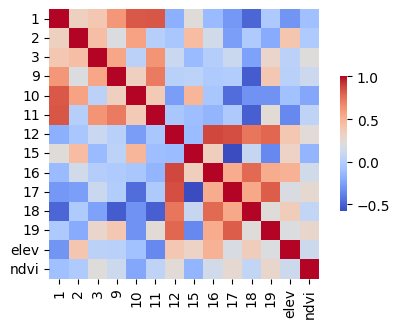

In [58]:
cov_reduced = df_reduced.cov()

plt.figure(figsize=(5.5, 3.5))  # Optional: Adjust the figure size as needed
sns.heatmap(cov_reduced, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})

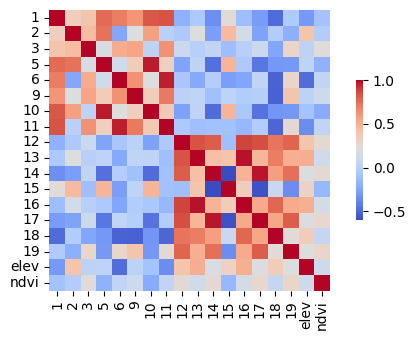

In [47]:
cov_matrix = cov_df.cov()

# Create the heatmap
plt.figure(figsize=(5.5, 3.5))  # Optional: Adjust the figure size as needed
sns.heatmap(cov_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.title('Osmia Native Range Covariance')
plt.tight_layout()
plt.savefig('figures/heatmaps/cov_heatmap2.svg', format='svg')

Text(0.5, 1.0, 'North America Covariance')

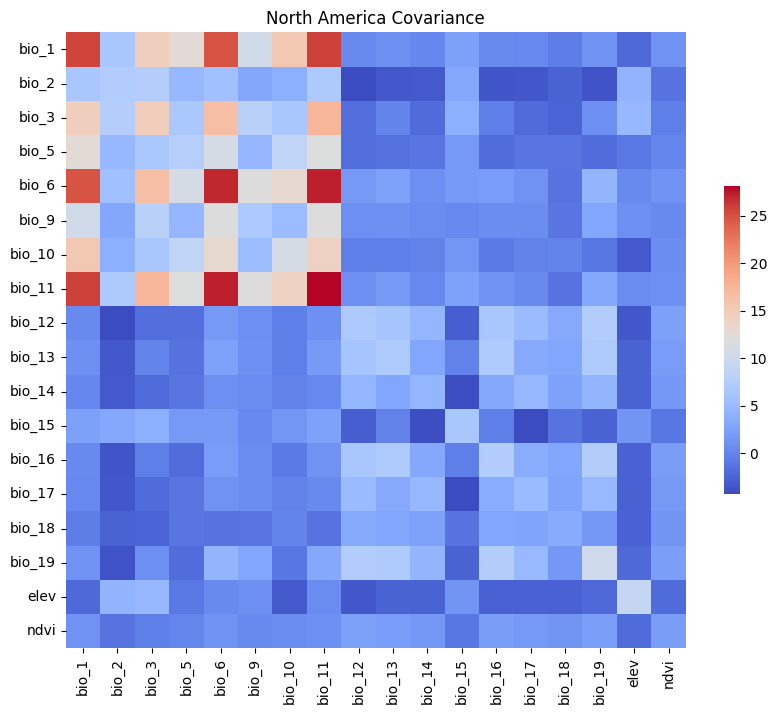

In [29]:
cov_matrix = america_scaled.cov()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size as needed
sns.heatmap(cov_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('North America Covariance')

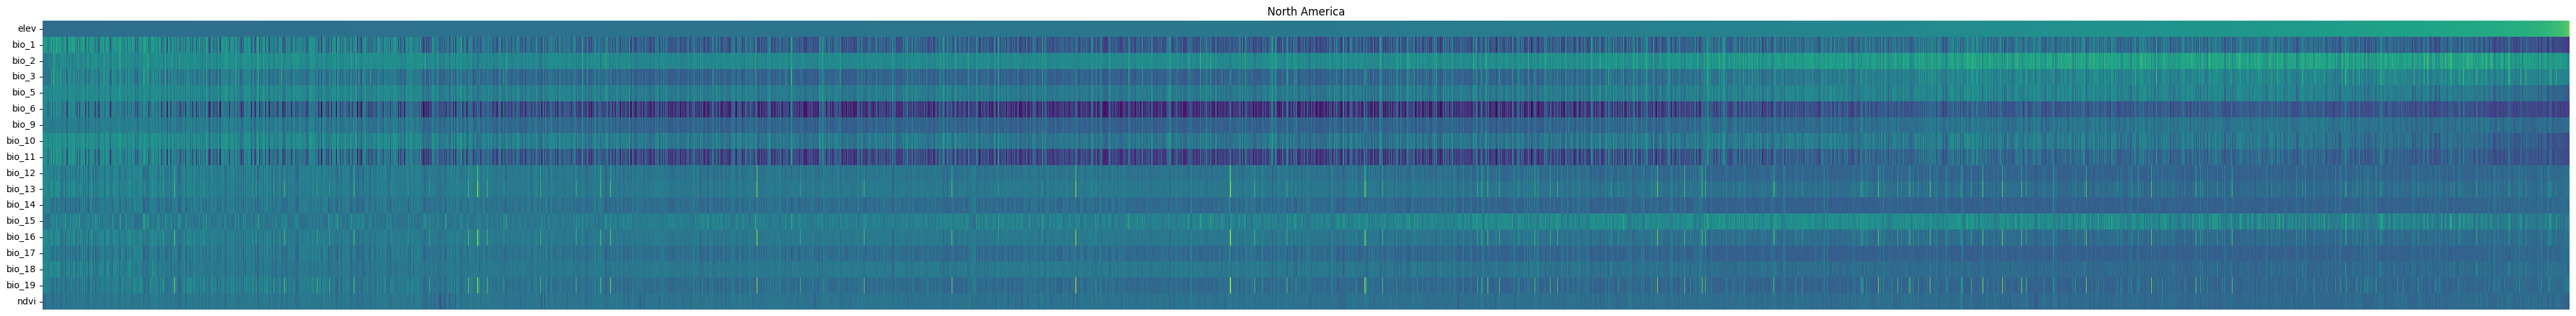

In [ ]:
am_sorted = america_scaled.sort_values(by='elev')
subset_am = am_sorted.iloc[::1]




# Transpose the subset for the heatmap
transposed_subset = subset_am.transpose()
new_row_order = ['elev'] + [idx for idx in transposed_subset.index if idx != 'elev']
transposed_subset = transposed_subset.reindex(new_row_order)


# Plotting
plt.figure(figsize=(40, 5))  # Adjust the figure size as needed
ax = sns.heatmap(transposed_subset, cmap='viridis', cbar=False)
ax.set_xticks([])
ax.set_xticklabels([])
plt.title('North America')
plt.tight_layout()
plt.savefig('na_heatmap.png',dpi=300, format='png')


In [ ]:
os_sorted = osmia_scaled.sort_values(by='elev')
subset_os = os_sorted.iloc[::10]

transposed_subset = subset_os.transpose()
new_row_order = ['elev'] + [idx for idx in transposed_subset.index if idx != 'elev']
transposed_subset = transposed_subset.reindex(new_row_order)

plt.figure(figsize=(10, 3))  # Adjust the figure size as needed
ax = sns.heatmap(transposed_subset, cmap='viridis', cbar=False)
ax.set_xticks([])
ax.set_xticklabels([])
plt.title('Osmia occurrences')
plt.tight_layout()
plt.savefig('osmia_heatmap.png',dpi=300, format='png')
 


ValueError: could not convert string to float: 'osmia'

<Figure size 1000x300 with 0 Axes>

Explained Variance Ratio: [0.34418693 0.22504714 0.19781974 0.07252751]
Total explained variance: 0.8395813218121921


Text(0.5, 1.0, 'PCA Loadings Heatmap')

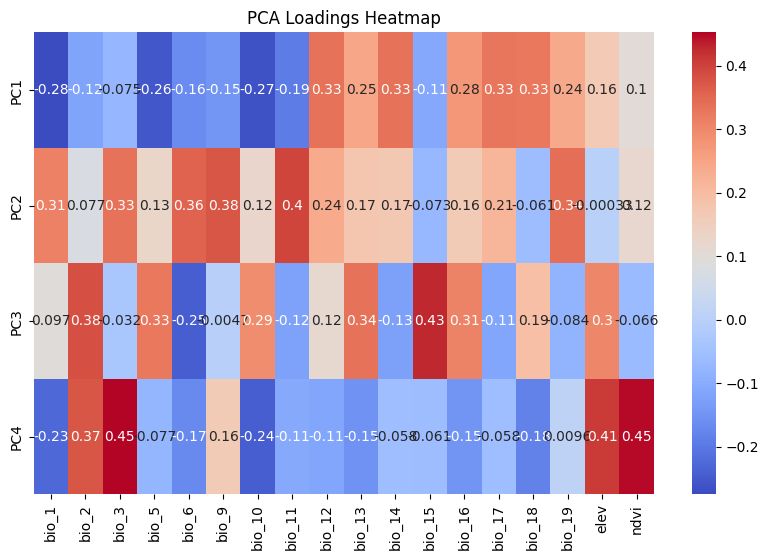

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=4) 
pca_result = pca.fit_transform(osmia_scaled) 
loadings = pca.components_
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())
loadings_df = pd.DataFrame(loadings, columns=combined_scaled.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')

In [ ]:
n_components = pca_result.shape[1]

for i in range(n_components):
    osmia_scaled[f'PC{i+1}'] = pca_result[:, i]


In [ ]:
america_pca = pca.transform(america_scaled)
for i in range(n_components):
    america_scaled[f'PC{i+1}'] = america_pca[:, i]

In [ ]:
america_scaled

,bio_1,bio_2,bio_3,bio_5,bio_6,bio_9,bio_10,bio_11,bio_12,bio_13,...,bio_16,bio_17,bio_18,bio_19,elev,ndvi,PC1,PC2,PC3,PC4
0,8.839268,10.667260,11.813945,6.609001,4.503022,3.176782,6.613421,7.993513,-4.044001,-2.617735,...,-2.947332,-4.100915,-2.389401,-2.949455,-0.702481,-1.786712,-18.957986,10.042390,8.690288,4.669572
1,9.367779,10.278208,11.045915,7.176604,4.929401,3.606032,7.115559,7.984340,-3.290194,-0.376513,...,-1.030417,-4.100915,-0.568933,-2.864136,0.893677,-1.650214,-17.539437,10.940158,12.506105,3.357047
2,11.011694,8.620103,11.223847,6.609001,5.782160,3.514050,7.767271,9.305179,-0.788058,5.277476,...,4.443853,-3.940446,2.389329,-2.650839,-0.716123,0.635750,-13.355097,14.896833,15.322152,-0.104609
3,10.704421,8.249577,11.265368,6.609001,6.101944,3.725268,6.912567,9.497801,0.972938,8.486497,...,7.448249,-3.699742,5.977754,-1.882967,0.757253,1.942619,-8.936704,16.765263,17.506510,-0.543082
4,3.443541,6.239474,12.632592,0.674974,2.211233,1.762985,-0.181468,4.673072,3.221693,10.880529,...,9.918122,-2.629946,8.515908,0.313999,9.274645,2.210141,4.067719,11.588715,17.041929,6.222203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,-10.783237,2.163686,-4.900193,-3.246645,-15.057129,-5.316223,-4.593872,-13.194935,0.187458,0.998781,...,1.015522,-0.463609,0.988969,-0.752490,1.416635,-0.941194,11.293958,-18.790516,5.066240,5.103082
6531,-10.706418,1.283687,-5.295807,-3.762647,-14.684047,-5.503594,-4.903702,-12.855553,0.219131,1.049718,...,0.886499,-0.142670,1.251536,-0.645841,1.239284,-5.061609,11.427488,-19.197789,4.366924,2.580865
6532,-10.635746,2.386002,-4.657737,-3.091844,-14.737344,-5.231055,-4.529769,-12.919760,0.567529,1.304402,...,1.236705,0.151524,1.251536,-0.368554,1.393898,-1.491209,11.877798,-17.864474,5.069438,4.689920
6533,-10.672618,1.089160,-5.013592,-4.433450,-14.204370,-5.346884,-5.309686,-12.433618,0.656212,1.151592,...,0.997091,0.499207,1.356563,-0.133926,1.239284,-4.997980,12.407548,-18.223312,3.443820,2.567246


In [ ]:
# combined_filtered['group'] = combined_clipped['group']
america_scaled['group'] = 'america'
osmia_scaled['group'] = 'osmia'

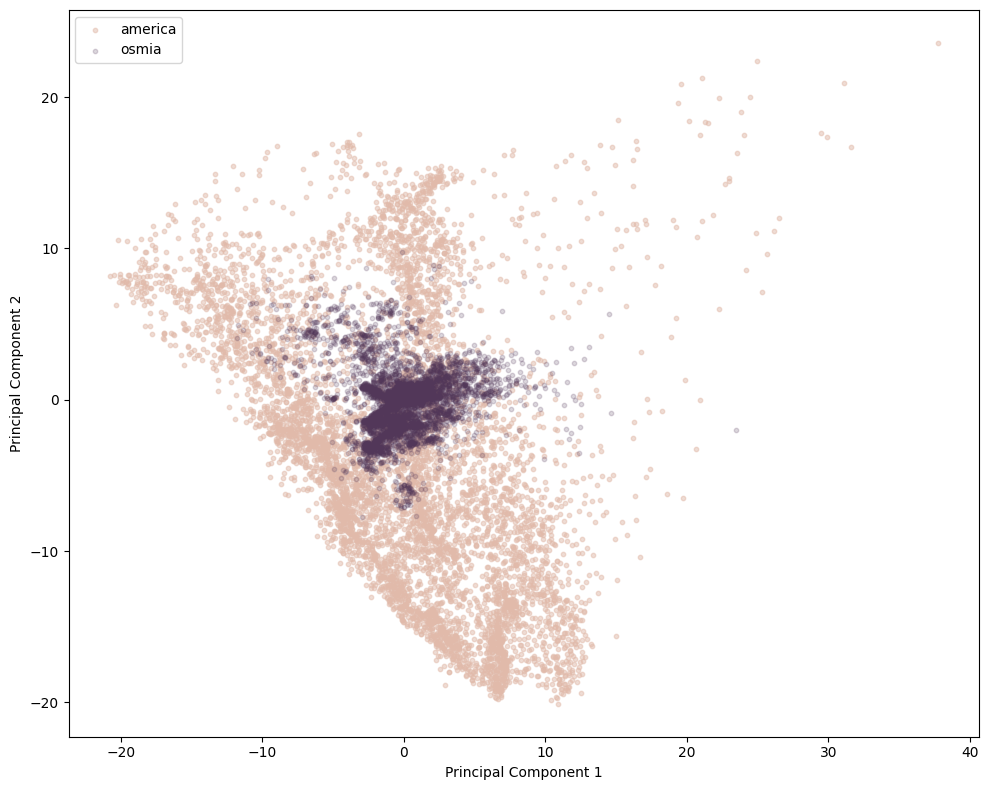

In [ ]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(10, 8))

# unique_labels = combined['group'].unique()  
# for i, label in enumerate(unique_labels):
#     subset = combined_filtered[combined_filtered['group'] == label]  
#     plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.5)

plt.scatter(america_scaled['PC1'], america_scaled['PC2'], c='#E1BAAA', label='america', s=10, marker= 'o', alpha=0.5)
plt.scatter(osmia_scaled['PC1'], osmia_scaled['PC2'], c='#523759', label='osmia', s=10, marker= 'o', alpha=0.2)
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

In [ ]:
# osmia_scaled.reset_index(inplace=True)
# osmia_scaled[osmia_scaled['PC1']<-6]

In [ ]:
# osmia_coords.iloc[3666]

In [ ]:
# osmia_coords.iloc[3666]['lat']
# plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax = plt.gca()
# ax.set_extent([-11, 53, 34,  66]) 

# ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
# ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
# ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
# ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

# ax.scatter(osmia_coords.iloc[3666]['lon'], osmia_coords.iloc[3666]['lat'], transform=ccrs.PlateCarree(), marker='o', color='red', s=3)
# ax.axis('off')

In [ ]:
osmia_pca_df = osmia_scaled.iloc[:, -(n_components+1):-1].reset_index(drop=True)
# america_pca_df = combined_filtered[combined_filtered['group'] == 'america']
america_pca_df = america_scaled.iloc[:, -(n_components+1):-1].reset_index(drop=True)
# europe_pca_df = combined_filtered[combined_filtered['group'] == 'europe']
# europe_pca_df = europe_pca_df.iloc[:, -6:-1].reset_index(drop=True)


In [ ]:
america_pca_df

,PC1,PC2,PC3,PC4
0,-18.957986,10.042390,8.690288,4.669572
1,-17.539437,10.940158,12.506105,3.357047
2,-13.355097,14.896833,15.322152,-0.104609
3,-8.936704,16.765263,17.506510,-0.543082
4,4.067719,11.588715,17.041929,6.222203
...,...,...,...,...
6530,11.293958,-18.790516,5.066240,5.103082
6531,11.427488,-19.197789,4.366924,2.580865
6532,11.877798,-17.864474,5.069438,4.689920
6533,12.407548,-18.223312,3.443820,2.567246


In [ ]:
from concurrent.futures import ProcessPoolExecutor

def min_distance_to_osmia_points(america_point):
    distances = [np.linalg.norm(america_point - osmia_point) for osmia_point in osmia_pca_df.to_numpy()]
    return min(distances)

america_pca_arr = america_pca_df.to_numpy()

with ProcessPoolExecutor() as executor:
    shortest_distances_only = list(executor.map(min_distance_to_osmia_points, america_pca_arr))


In [ ]:
import heapq

osmia_pca_arr = osmia_pca_df.to_numpy()

def second_smallest_distance_to_osmia_points(america_point):
    distances = [np.linalg.norm(america_point - osmia_point) for osmia_point in osmia_pca_df.to_numpy()]
    # Use heapq.nsmallest to get the two smallest distances and return the second one
    two_smallest_distances = heapq.nsmallest(2, distances)
    return two_smallest_distances[1] if len(two_smallest_distances) > 1 else None


with ProcessPoolExecutor() as executor:
    second_shortest_distances_only = list(executor.map(second_smallest_distance_to_osmia_points, osmia_pca_arr))


Text(0.5, 1.0, 'distribution of mahal distances, america to eur')

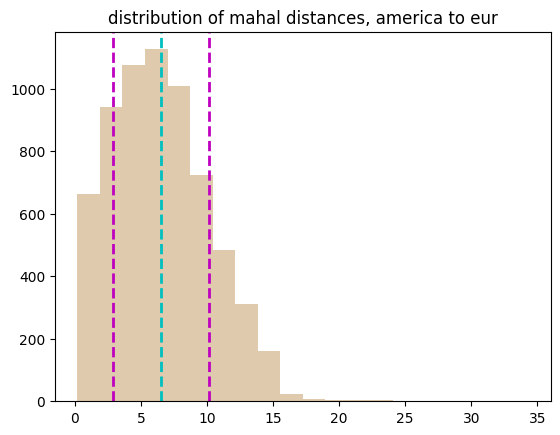

In [ ]:
mean = np.mean(shortest_distances_only)
std_dev = np.std(shortest_distances_only)

# Create histogram
plt.hist(shortest_distances_only, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, america to eur')

Text(0.5, 1.0, 'distribution of mahal distances, eur to eur')

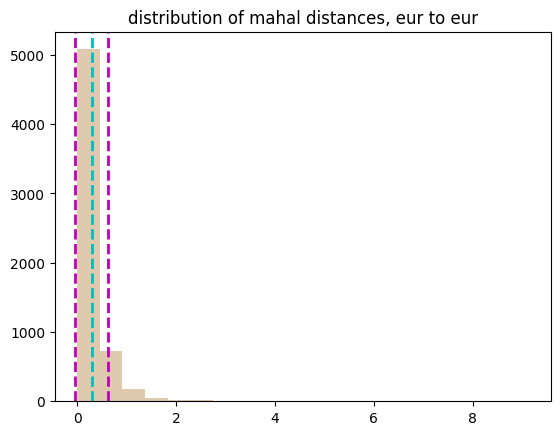

In [ ]:
mean = np.mean(second_shortest_distances_only)
std_dev = np.std(second_shortest_distances_only)
# z = 1.96
# upper_bound = mean + z * std_dev

plt.hist(second_shortest_distances_only, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
# plt.axvline(upper_bound, color='k', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, eur to eur')

In [ ]:
america_points['dist'] = shortest_distances_only

In [ ]:
# mahal_distances_eur = mahal_distances_eur.reset_index(drop=True)

# crta_coords_filtered['dist'] = mahal_distances_eur

(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

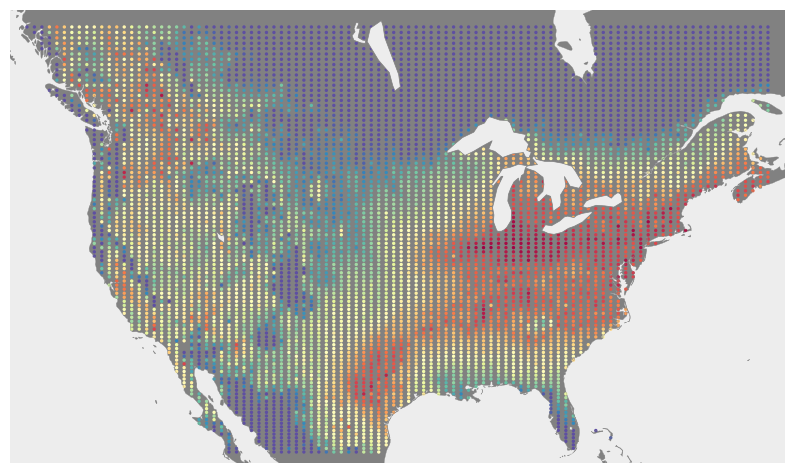

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]

map_projection = ccrs.Mercator() 

great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['dist'], cmap='Spectral', vmin=min(shortest_distances_only), vmax = max(second_shortest_distances_only), s=2)

ax.axis('off')


(-10.11298075, 46.55047775, 33.71471915, 61.16589785)

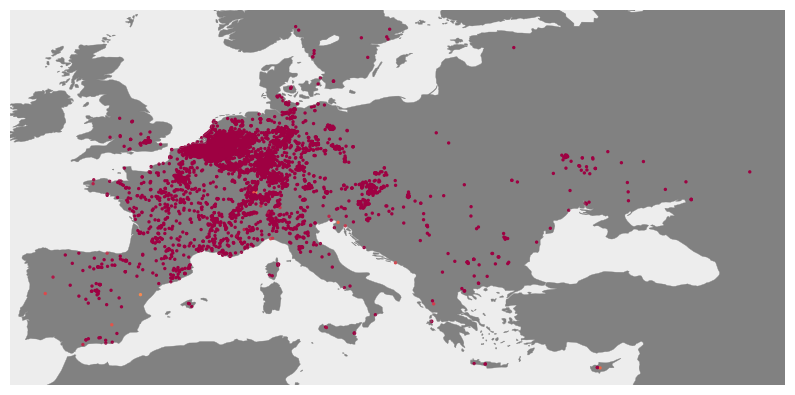

In [ ]:
plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

ax.scatter(osmia_coords['lon'], osmia_coords['lat'], transform=ccrs.PlateCarree(), 
           c=second_shortest_distances_only, s=2, cmap='Spectral', vmin=2, vmax = 8)
ax.axis('off')
